<a href="https://colab.research.google.com/github/hashmis79/SRAAssignments/blob/master/RotateImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(304, 244, 3)
Enter the Angle by which you want to rotate the image45


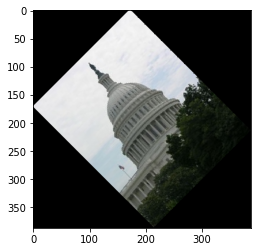

In [28]:
import numpy as np
from PIL import Image
import math as m
import matplotlib.pyplot as plt

def getRotMat(h,w,angle):
  cos = m.cos(angle*np.pi/180)
  sin = m.sin(angle*np.pi/180)
  return np.array([[cos,sin],[-sin,cos]])

def checkNegative(matrix):
  u = list()
  v = list()
  v.append(int((image.shape[1]-1)*matrix[0,0]+(0)*matrix[0,1]))
  v.append(int((0)*matrix[0,0]+(image.shape[0]-1)*matrix[0,1]))
  v.append(int((image.shape[1]-1)*matrix[0,0]+(image.shape[0]-1)*matrix[0,1]))
  u.append(int((image.shape[1]-1)*matrix[1,0]+(0)*matrix[1,1]))
  u.append(int((0)*matrix[1,0]+(image.shape[0]-1)*matrix[1,1]))
  u.append(int((image.shape[1]-1)*matrix[1,0]+(image.shape[0]-1)*matrix[1,1]))
  if min(u)<0 and min(v)<0:
    return -(min(u)),-(min(v))
  elif min(u)<0:
    return -(min(u)),0
  elif min(v)<0:
    return 0,-(min(v))
  else:
    return 0,0

  

image = plt.imread('blur.jpeg')
print(image.shape)
angle = int(input('Enter the Angle by which you want to rotate the image'))
matrix = getRotMat(image.shape[0],image.shape[1],angle)
cos = abs(matrix[0,0])
sin = abs(matrix[0,1])
newWidth = int((image.shape[0] * sin) + (image.shape[1] * cos))
newHeight = int((image.shape[0] * cos) + (image.shape[1] * sin))
x = newWidth-image.shape[1]/2
y = newHeight-image.shape[0]/2
np1 = np.zeros((newHeight,newWidth,image.shape[2]),dtype = image.dtype)
# z1 = int((image.shape[0]-1)*matrix[0,0]+(0)*matrix[0,1])
# z2 = int((image.shape[0]-1)*matrix[0,0]+(image.shape[1]-1)*matrix[0,1])
z1,z2 = checkNegative(matrix)
for s in range(image.shape[2]):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      v = int((j)*matrix[0,0]+(i)*matrix[0,1]+z2)
      u = int((j)*matrix[1,0]+(i)*matrix[1,1]+z1)
      np1[u,v,s] = image[i,j,s]

for i in range(np1.shape[0]):
    prev = np1[i,0]
    for j in range(rotated.shape[1]-1):
        # to find void space
        try:
          if not any(np1[i,j]) and any(np1[i,j+1]):
            np1[i][j][:] = prev
          else:
            prev = np1[i][j][:]
        except:
          continue
plt.imshow(np1)